In [1]:
import matplotlib as plt
import pandas as pd 
import seaborn as sns

In [ ]:
data2 = 

In [2]:
data = pd.read_csv("Resources/startup_data_cleaned.csv")
data.head()

,Unnamed: 0,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,reached_milestone,founded_first_funding__days_difference,first_last_funding_days_difference
0,0,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,...,1,0,0,0,0,1.0000,0,1,821,275
1,1,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,...,0,0,1,1,1,4.7500,1,1,1871,1778
2,2,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,...,0,1,0,0,0,4.0000,1,1,377,0
3,3,1,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,...,0,0,1,1,1,3.3333,1,1,1143,797
4,4,0,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,...,1,0,0,0,0,1.0000,1,1,0,609


<AxesSubplot:xlabel='funding_total_usd', ylabel='labels'>

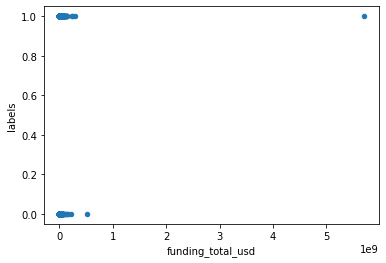

In [6]:
data.plot(x="funding_total_usd", y="labels", kind="scatter")

In [8]:
null_data = data.isnull().sum()
null_data

Unnamed: 0                                  0
labels                                      0
age_first_funding_year                      0
age_last_funding_year                       0
age_first_milestone_year                  152
age_last_milestone_year                   152
relationships                               0
funding_rounds                              0
funding_total_usd                           0
milestones                                  0
is_CA                                       0
is_NY                                       0
is_MA                                       0
is_TX                                       0
is_otherstate                               0
is_software                                 0
is_web                                      0
is_mobile                                   0
is_enterprise                               0
is_advertising                              0
is_gamesvideo                               0
is_ecommerce                      

In [9]:
## percentage of null data 
(null_data/len(data))*100

Unnamed: 0                                 0.000000
labels                                     0.000000
age_first_funding_year                     0.000000
age_last_funding_year                      0.000000
age_first_milestone_year                  16.468039
age_last_milestone_year                   16.468039
relationships                              0.000000
funding_rounds                             0.000000
funding_total_usd                          0.000000
milestones                                 0.000000
is_CA                                      0.000000
is_NY                                      0.000000
is_MA                                      0.000000
is_TX                                      0.000000
is_otherstate                              0.000000
is_software                                0.000000
is_web                                     0.000000
is_mobile                                  0.000000
is_enterprise                              0.000000
is_advertisi

In [103]:
first_model = data.copy()
first_model=first_model.drop("Unnamed: 0", axis=1)

In [104]:
### doing  first model without taking out null data but transforming it to 0

first_model["age_first_milestone_year"] = first_model["age_first_milestone_year"].fillna(value=0)
first_model["age_last_milestone_year"] = first_model["age_last_milestone_year"].fillna(value=0)

In [105]:
first_model[first_model.age_last_milestone_year.isnull()]

,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,reached_milestone,founded_first_funding__days_difference,first_last_funding_days_difference


In [106]:
features= first_model.drop("labels",axis=1)
features = features.columns.to_list()

In [107]:
features

['age_first_funding_year',
 'age_last_funding_year',
 'age_first_milestone_year',
 'age_last_milestone_year',
 'relationships',
 'funding_rounds',
 'funding_total_usd',
 'milestones',
 'is_CA',
 'is_NY',
 'is_MA',
 'is_TX',
 'is_otherstate',
 'is_software',
 'is_web',
 'is_mobile',
 'is_enterprise',
 'is_advertising',
 'is_gamesvideo',
 'is_ecommerce',
 'is_biotech',
 'is_consulting',
 'is_othercategory',
 'has_VC',
 'has_angel',
 'has_roundA',
 'has_roundB',
 'has_roundC',
 'has_roundD',
 'avg_participants',
 'is_top500',
 'reached_milestone',
 'founded_first_funding__days_difference',
 'first_last_funding_days_difference']

<AxesSubplot:>

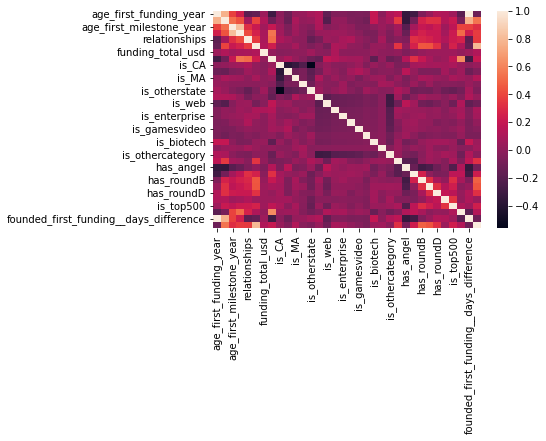

In [35]:
sns.heatmap(data=first_model[features].corr())

c:\Users\OMEN\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='labels', ylabel='count'>

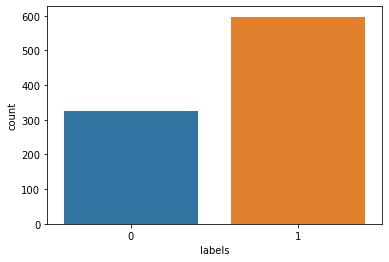

In [64]:
sns.countplot(data["labels"])

In [108]:
X = data.drop("labels", axis=1)
y= data["labels"]

In [55]:
from sklearn.model_selection import train_test_split
import lazypredict
#importing lazy classifier
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [54]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

In [110]:
## Scale data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_scaled_train = X_scaler.transform(X_train)
X_scaled_test = X_scaler.transform(X_test)

In [62]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.82               0.79     0.79      0.82   
BaggingClassifier                  0.79               0.77     0.77      0.79   
AdaBoostClassifier                 0.81               0.77     0.77      0.80   
RandomForestClassifier             0.81               0.77     0.77      0.80   
LGBMClassifier                     0.80               0.76     0.76      0.79   
LogisticRegression                 0.77               0.75     0.75      0.77   
NuSVC                              0.78               0.74     0.74      0.78   
CalibratedClassifierCV             0.78               0.74     0.74      0.78   
DecisionTreeClassifier             0.77               0.74     0.74      0.77   
LinearSVC                          0.77               0.74     0.74      0.77   
BernoulliNB                 

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [85]:
rf_model = RandomForestClassifier(n_estimators=200)

In [114]:
#fit the model
rf_model = rf_model.fit(X_scaled_train, y_train)

In [115]:
predictions = rf_model.predict(X_scaled_test)

In [116]:
cm  = confusion_matrix(y_test, predictions)
cm

array([[ 46,  36],
       [ 14, 135]], dtype=int64)

In [117]:
first_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 35 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   labels                                  923 non-null    int64  
 1   age_first_funding_year                  923 non-null    float64
 2   age_last_funding_year                   923 non-null    float64
 3   age_first_milestone_year                923 non-null    float64
 4   age_last_milestone_year                 923 non-null    float64
 5   relationships                           923 non-null    int64  
 6   funding_rounds                          923 non-null    int64  
 7   funding_total_usd                       923 non-null    int64  
 8   milestones                              923 non-null    int64  
 9   is_CA                                   923 non-null    int64  
 10  is_NY                                   923 non-null    int64 

In [118]:
importance = rf_model.feature_importances_
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.13018454144038016, 'relationships'),
 (0.08868738372995777, 'funding_total_usd'),
 (0.07805301909043916, 'age_last_milestone_year'),
 (0.06504195822000869, 'age_last_funding_year'),
 (0.06471186400951455, 'founded_first_funding__days_difference'),
 (0.0638291933790672, 'age_first_milestone_year'),
 (0.062037196925549064, 'age_first_funding_year'),
 (0.0578123838809522, 'Unnamed: 0'),
 (0.054152500572757105, 'avg_participants'),
 (0.05268868811482739, 'milestones'),
 (0.04840428373800629, 'first_last_funding_days_difference'),
 (0.04067316919245062, 'is_top500'),
 (0.027834405208547786, 'funding_rounds'),
 (0.02611389776763316, 'reached_milestone'),
 (0.01112682648210545, 'has_roundB'),
 (0.010846495254833213, 'has_roundC'),
 (0.010095735951073518, 'is_othercategory'),
 (0.009884864283615617, 'has_VC'),
 (0.009662353340136997, 'has_roundA'),
 (0.009506221434695677, 'is_otherstate'),
 (0.008921583250441898, 'is_CA'),
 (0.008233444534505759, 'is_software'),
 (0.006963885745755848, 'is

In [119]:
from sklearn.metrics import log_loss, auc

In [120]:
print(auc(y_test, predictions))

ValueError: x is neither increasing nor decreasing : [1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1
 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1
 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1
 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 1 1 0 1 0 1 1 1 1].

In [121]:
log_loss(y_test, predictions)

7.4760502391905685

In [125]:
from sklearn.metrics import accuracy_score

In [126]:
accuracy_score(y_test, predictions)

0.7835497835497836

In [100]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71        82
           1       0.83      0.89      0.86       149

    accuracy                           0.81       231
   macro avg       0.80      0.78      0.78       231
weighted avg       0.81      0.81      0.81       231



In [69]:
import numpy as np

In [113]:
X_scaled_train = np.nan_to_num(X_scaled_train)
X_scaled_test = np.nan_to_num(X_scaled_test)

In [135]:
np.where(np.isnan(X_scaled_train))

(array([], dtype=int64), array([], dtype=int64))

In [72]:
np.isnan(np.min(X_scaled_train))

True

In [139]:
df_new = first_model[np.isfinite(first_model).all(1)]

In [140]:
y = df_new["labels"]
X = df_new.drop("labels", axis=1)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [142]:
scaler=StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_train)

In [129]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

For n_clusters = 2 The average silhouette_score is : 0.10633928528208152
For n_clusters = 3 The average silhouette_score is : 0.09998639118192473
For n_clusters = 4 The average silhouette_score is : 0.09956875230916802
For n_clusters = 5 The average silhouette_score is : 0.09247606095013029
For n_clusters = 6 The average silhouette_score is : 0.09878070510616839
For n_clusters = 7 The average silhouette_score is : 0.08654587159958585
For n_clusters = 8 The average silhouette_score is : 0.10921966646677447
For n_clusters = 9 The average silhouette_score is : 0.09350441628415739
For n_clusters = 10 The average silhouette_score is : 0.10015813593509007


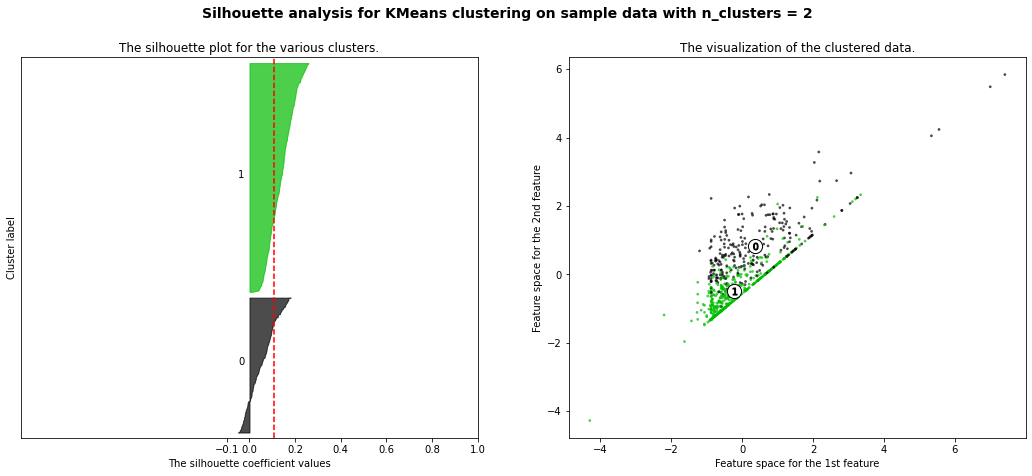

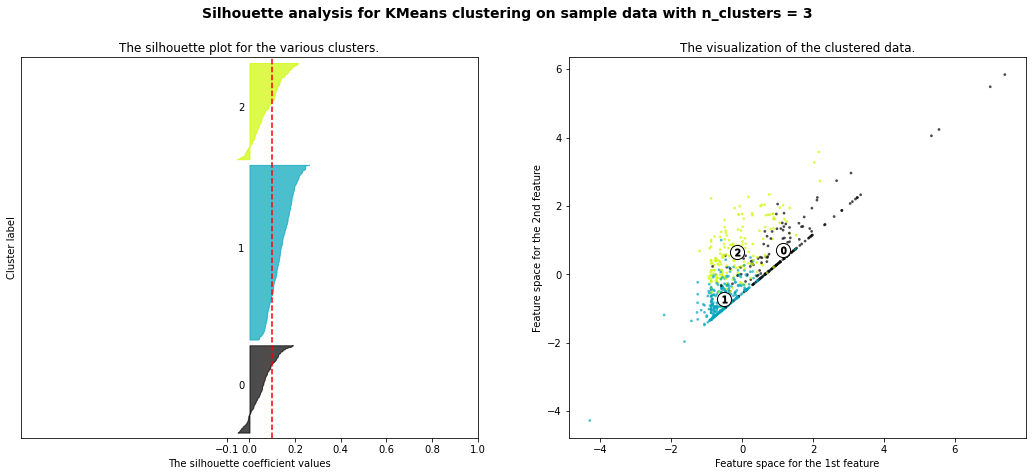

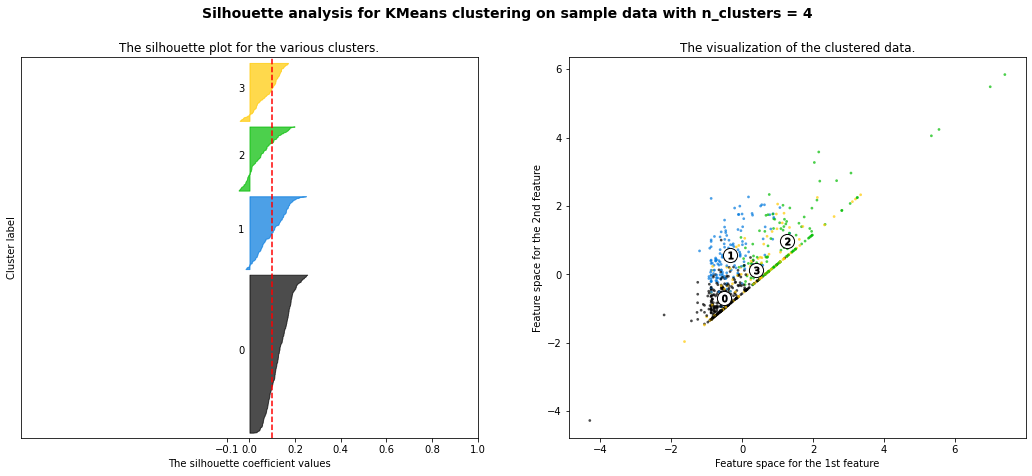

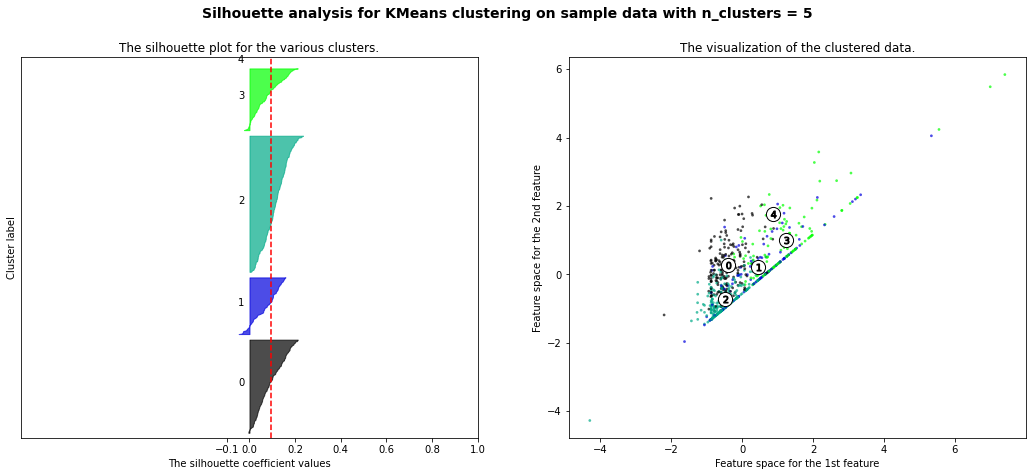

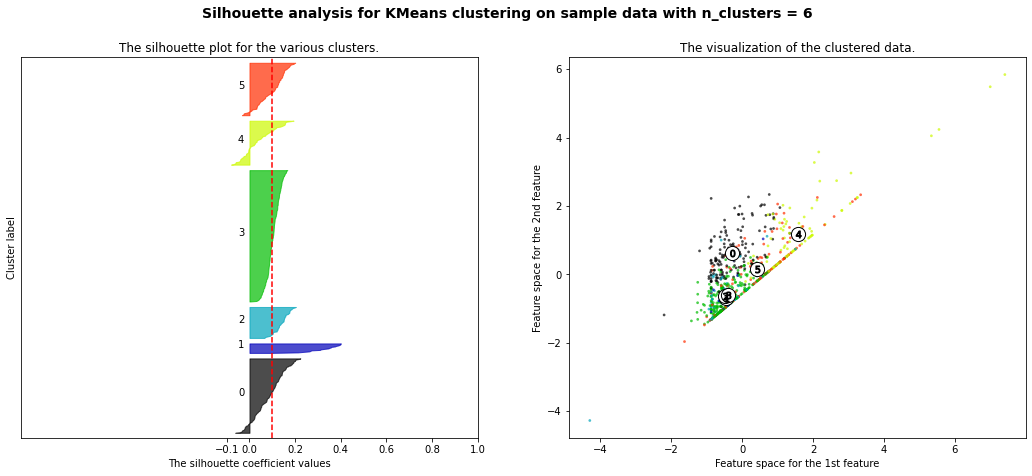

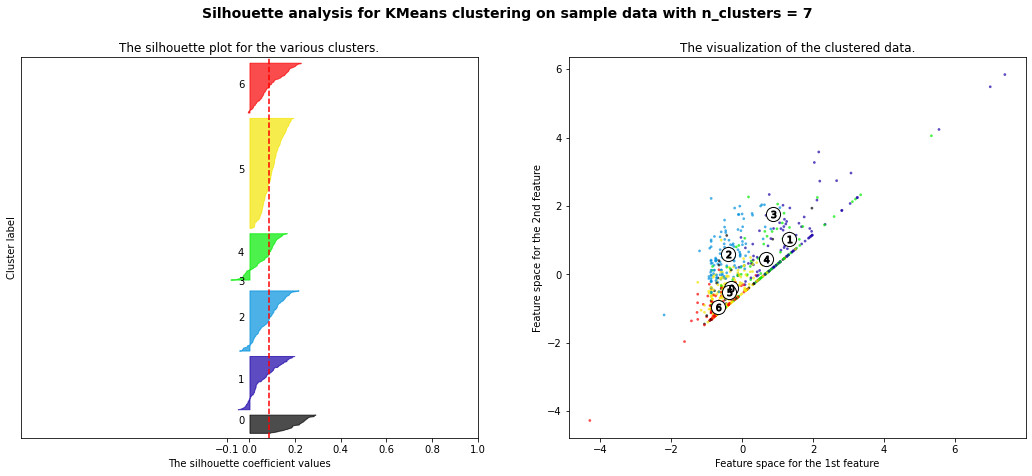

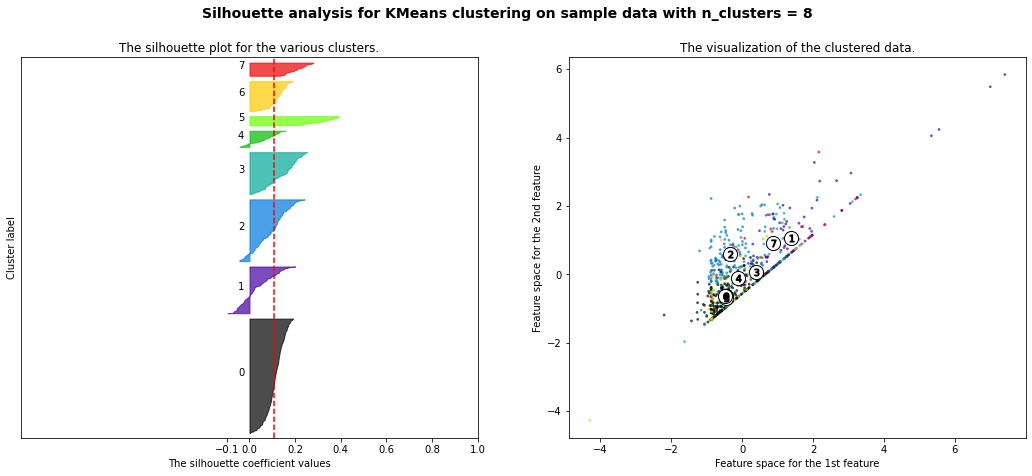

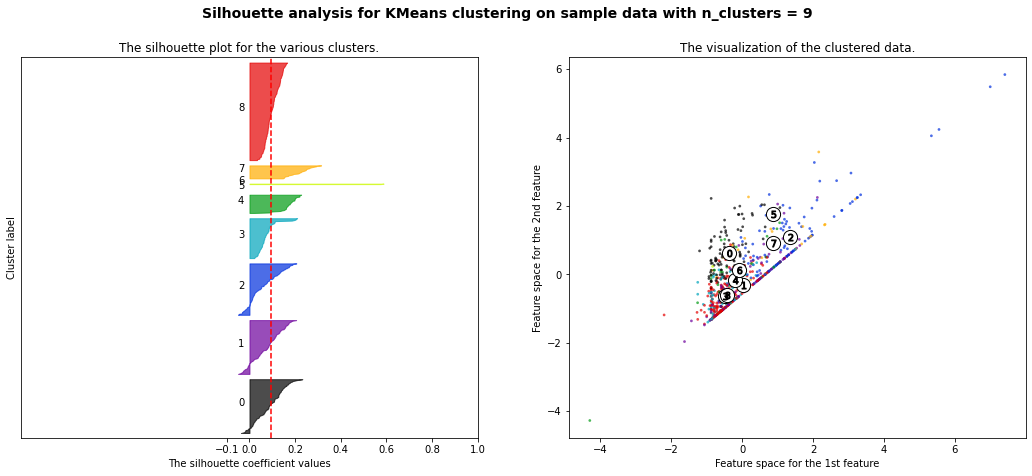

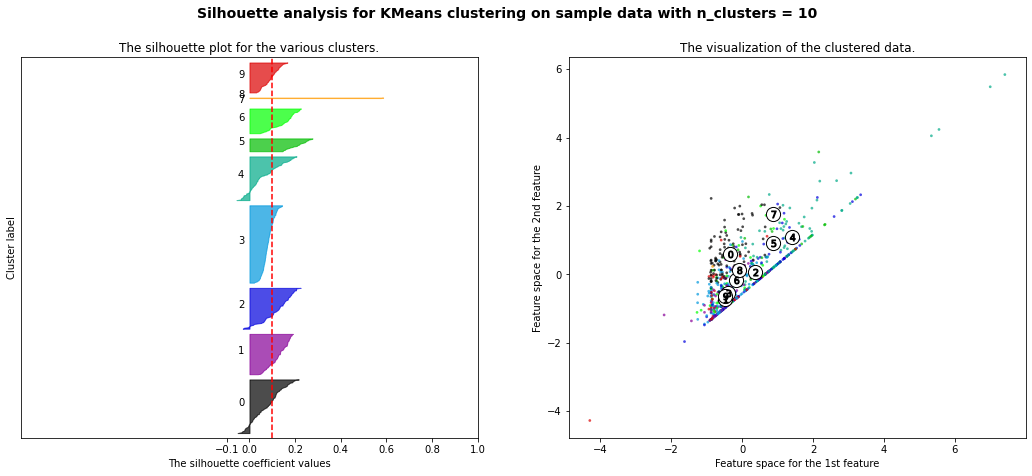

In [165]:

n_clusters = [2,3,4,5,6,7,8,9,10]
for n_clusters in n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_train_scaled[:, 0], X_train_scaled[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [146]:
from sklearn.decomposition import PCA

In [163]:
pca = PCA(n_components=30)
pca.fit_transform(X_train_scaled)

array([[-3.42100172e+00,  2.24505502e-01, -3.77179711e-01, ...,
        -2.84264912e-01,  2.32574154e-01,  5.66206060e-02],
       [ 2.19326372e+00, -1.30562043e+00, -1.88109840e+00, ...,
        -6.31976835e-01, -4.30551005e-01, -6.47140048e-02],
       [ 2.35754521e+00, -2.58509575e-01, -9.23648137e-01, ...,
        -2.71325570e-01,  2.10499755e-01,  3.79453490e-02],
       ...,
       [-1.29839770e+00,  2.53758583e+00, -1.62551533e+00, ...,
         1.06613285e+00,  7.78189934e-01,  8.91546905e-02],
       [ 3.64780034e-01,  7.40154195e-01,  1.50960747e+00, ...,
         3.20859614e-01,  3.66359295e-01, -3.40455501e-02],
       [-1.50688581e+00, -5.80069133e-02, -6.64565711e-01, ...,
        -3.39885798e-01,  4.24677193e-02, -1.04356468e-03]])

In [157]:
df_model_pca = pca.fit_transform(X_train_scaled)
df_model = pd.DataFrame(data=df_model_pca,columns=["pca_1", "pca_2", "pca_3"])
df_model.head()

ValueError: Shape of passed values is (692, 6), indices imply (692, 3)

In [164]:
pca.explained_variance_ratio_

array([0.13677328, 0.10981014, 0.06335029, 0.05228147, 0.04166487,
       0.0410209 , 0.03850298, 0.03555268, 0.03479414, 0.03433621,
       0.03392171, 0.03219515, 0.03122768, 0.03032194, 0.02965086,
       0.02850804, 0.02748547, 0.02602093, 0.02486565, 0.02398792,
       0.02207449, 0.01970886, 0.01642556, 0.0154151 , 0.01486699,
       0.01255189, 0.00841939, 0.00731439, 0.00454047, 0.00234722])

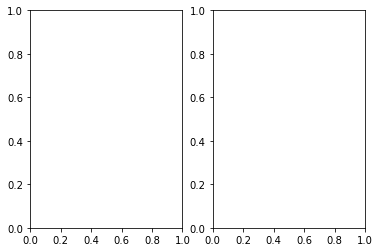

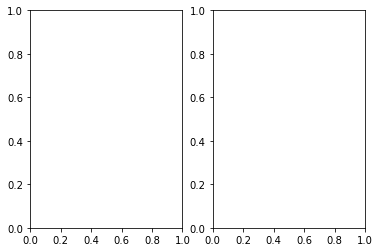

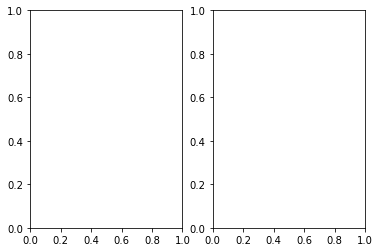

In [124]:
n_clusters = [2,3,4,5]
for cluster in range_predict:
    # create subplot for the hahas
    fig, (ax1, ax2 ) = plt.subplots(1,2)
    ax1.set_xlim([-0.1,1])
    X_scaled_train = np.nan_to_num(X_scaled_train)
    X_scaled_test = np.nan_to_num(X_scaled_test)

    ax1.set_ylim([0, len(X_scaled_train) + (cluster + 1) * 10])

    ## Initialize clusters
    clusterer = Kmeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X_scaled_train)

    silhouette_avg = silhouette_score(X_scaled_train, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    